### Import necessary libraries

In [2]:
import numpy as np

import matplotlib.pyplot as plt

### ================================
### Step 1: Generate Synthetic Data
### ================================

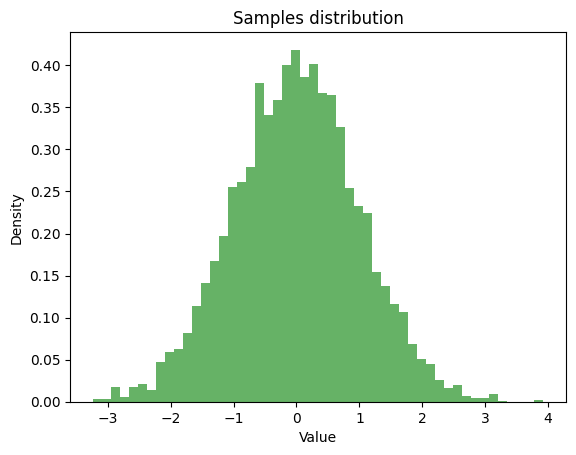

In [4]:
np.random.seed(42)
N = 500  # Total data points
d = 12   # Number of features
train_ratio = 0.7
val_ratio = 0.15

# Generate feature matrix and true weights
X = np.random.normal(0, 1, (N, d))
## Plotting the samples distribution
plt.hist(X.flatten(), bins=50, density=True, alpha=0.6, color='g')
plt.title('Samples distribution')   
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

true_weights = np.linspace(1, 5, d)  # Linearly spaced true weights
epsilon = np.random.normal(0, 0.5, N)  # Noise
y = X @ true_weights + epsilon  # Generate target values

# Split data into train, validation, and test sets
train_size = int(N * train_ratio)
val_size = int(N * val_ratio)
test_size = N - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

### ================================
### Step 2: Ridge Regression Functions
### ================================

In [12]:
def ridge_loss(w, X, y, lam):
    
    """
    NOTE: This is the complete version of the function.
    Calculate the ridge regression loss.
    For each sample, we are calculating the residuals and then summing them up.
    w: Weights (n_features,)
    X: Features (n_samples, n_features)
    y: Target values (n_samples,)
    lam: Regularization parameter
    
    Returns: Ridge regression loss
    
    The equation for the ridge regression loss is: L(w) = ||y - Xw||^2 + λ||w||^2
    
    """
    
    # we are calculating the residuals here
    residuals = y - X @ w
    # we are returning the sum of the residuals squared plus the sum of the weights squared times the lambda
    return np.sum(residuals**2) + lam * np.sum(w**2)

def ridge_gradient(w, X, y, lam):
    """
    NOTE: This is the complete version of the function.
    Calculate the gradient of the ridge regression loss we calculated using the ridge_loss function.
    w: Weights (n_features,)
    X: Features (n_samples, n_features)
    y: Target values (n_samples,)
    lam: Regularization parameter
    
    Returns: Gradient of ridge regression loss with respect to weights
    
    The equation for the gradient of the ridge regression loss is: ∇L(w) = 2(X^T(xw - y) + λw)
    """
    grad = 2 * (X.T @ (X @ w - y) + lam * w)
    grad = np.clip(grad, -1e3, 1e3)
    return grad

def gradient_descent(loss_fn, grad_fn, w_init, X, y, lam, lr=0.01, tol=1e-6, max_iters=1000):
    """
    NOTE: This is the complete version of the function.
    Perform gradient descent to minimize the ridge regression loss.
    For each iteration, we calculate the gradient of the loss with respect to the weights and update the weights.
    We do this by calling the loss_fn and grad_fn functions.
    
    loss_fn: Function to calculate the loss
    grad_fn: Function to calculate the gradient
    w_init: Initial weights (n_features,)
    X: Features (n_samples, n_features)
    y: Target values (n_samples,)
    lam: Regularization parameter
    lr: Learning rate
    tol: Tolerance for stopping condition
    max_iters: Maximum number of iterations
    
    Returns: Final weights after optimization
    """
    w = w_init
    # we are iterating through the maximum epochs
    for i in range(max_iters):
        # For each epoch we calculate the gradient & update the weights
        grad = grad_fn(w, X, y, lam)
        w_new = w - lr * grad
        if np.linalg.norm(w_new - w, ord=2) < tol:
            break
        w = w_new
    return w

### ================================
### Step 3: Variance and Bias Calculation
### ================================

In [13]:
def calculate_bias_variance(X_train, y_train, X_val, y_val, lambdas, num_datasets=20,
                            sub_sample_size=50):
    """
    Calculate the bias and variance for ridge regression models trained on multiple datasets.
    """
    biases, variances = [], []
    for lam in lambdas:
        predictions = []
        for _ in range(num_datasets):
            # Sample with replacement
            indices = np.random.choice(len(X_train), size=sub_sample_size, replace=True)
            X_sample, y_sample = X_train[indices], y_train[indices]
            
            # Train ridge regression
            w_init = np.zeros(d)
            w = gradient_descent(ridge_loss, ridge_gradient, w_init, X_sample, y_sample, lam)
            
            # Predict on validation data
            predictions.append(X_val @ w)
        
        # Average predictions
        predictions = np.array(predictions)
        mean_prediction = np.mean(predictions, axis=0)
        bias = np.mean((mean_prediction - y_val)**2)
        variance = np.mean(np.var(predictions, axis=0))
        
        biases.append(bias)
        variances.append(variance)
    
    return biases, variances

### ================================
### Step 4: Plotting Functions
### ================================

In [14]:
# Empty sections for students to complete
def plot_coefficients_vs_lambda():
    plt.figure(figsize=(10, 6))
    lambdas = np.logspace(-5, 5, num=100)
    coefficients = []
    for lam in lambdas:
        w_init = np.zeros(d)
        w = gradient_descent(ridge_loss, ridge_gradient, w_init, X_train, y_train, lam)
        coefficients.append(w)
    coefficients = np.array(coefficients)
    for i in range(d):
        plt.plot(lambdas, coefficients[:, i], label=f'w{i+1}')
    plt.xscale('log')
    plt.xlabel('Lambda')
    plt.ylabel('Coefficient value')
    plt.legend()
    plt.title('Coefficient values vs. lambda')
    plt.show()

def plot_rmse_vs_lambda():
    plt.figure(figsize=(10, 6))
    lambdas = np.logspace(-5, 5, num=100)
    rmses = []
    for lam in lambdas:
        w_init = np.zeros(d)
        w = gradient_descent(ridge_loss, ridge_gradient, w_init, X_train, y_train, lam)
        rmse = np.sqrt(np.mean((X_val @ w - y_val)**2))
        rmses.append(rmse)
    plt.plot(lambdas, rmses)
    plt.xscale('log')
    plt.xlabel('Lambda')
    plt.ylabel('RMSE')
    plt.title('RMSE vs. lambda')
    plt.show()
    

def plot_predicted_vs_true():
    w_init = np.zeros(d)
    w = gradient_descent(ridge_loss, ridge_gradient, w_init, X_train, y_train, 0.1)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, X_test @ w, alpha=0.5)
    plt.plot([0, 30], [0, 30], color='red', linestyle='--')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.title('Predicted vs. true values')
    plt.show()

def plot_bias_variance_tradeoff():
    lambdas = np.logspace(-5, 5, num=100)
    biases, variances = calculate_bias_variance(X_train, y_train, X_val, y_val, lambdas)
    plt.figure(figsize=(10, 6))
    plt.plot(lambdas, biases, label='Bias')
    plt.plot(lambdas, variances, label='Variance')
    plt.xscale('log')
    plt.xlabel('Lambda')
    plt.ylabel('Bias/Variance')
    plt.legend()
    plt.title('Bias/Variance tradeoff')
    plt.show()

### ================================
### Step 5: Main Execution
### ================================

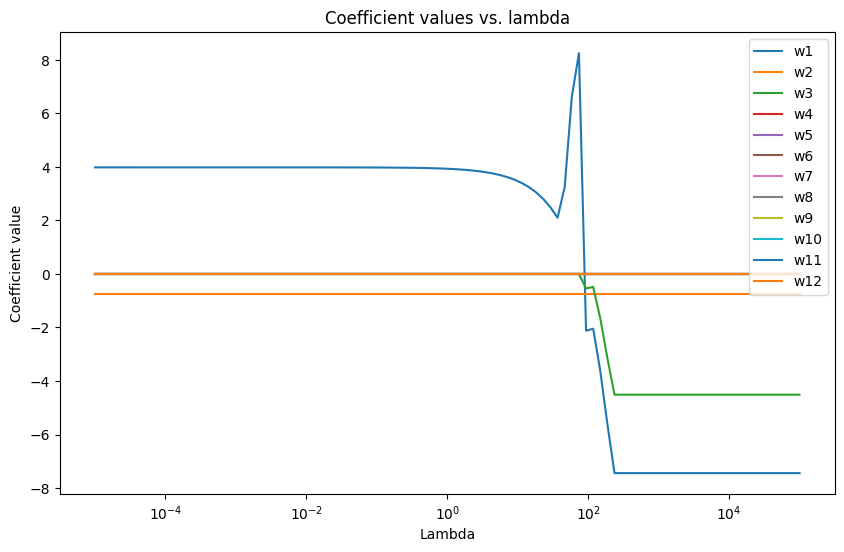

In [ ]:
plot_coefficients_vs_lambda()


### ================================
### Step 6: Plot Results
### ================================

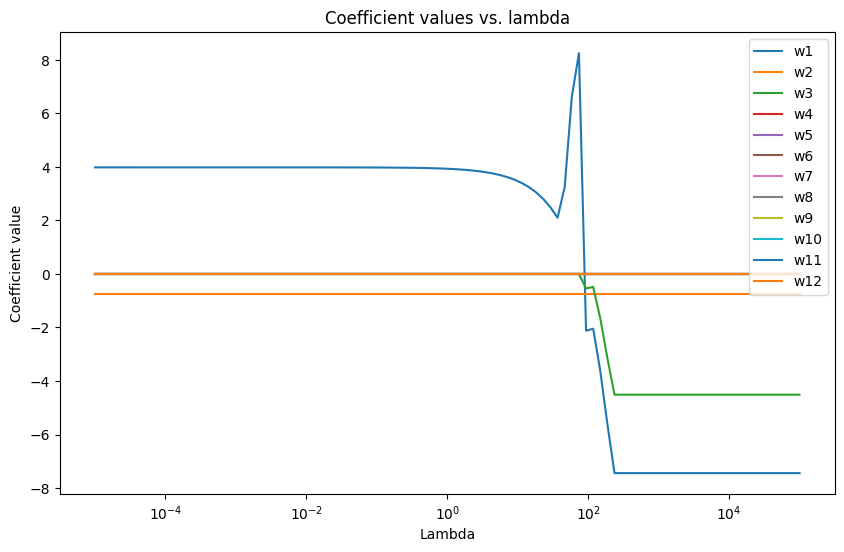

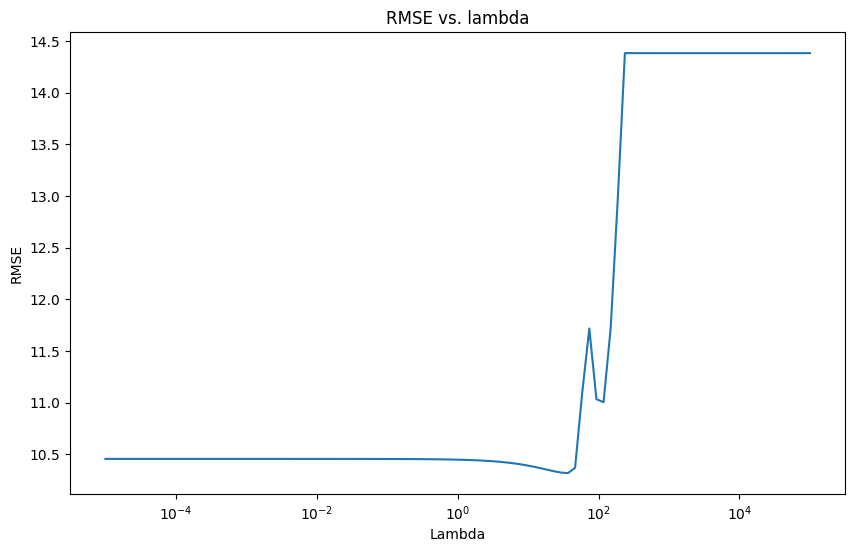

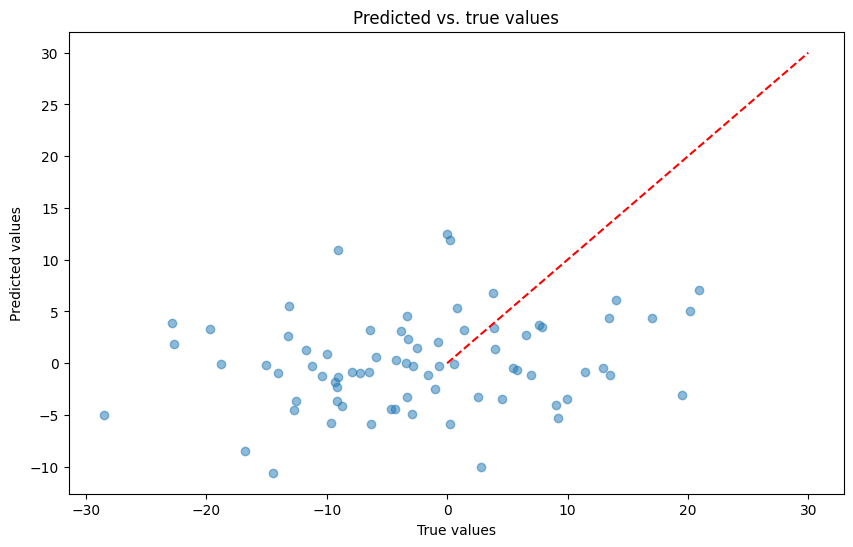

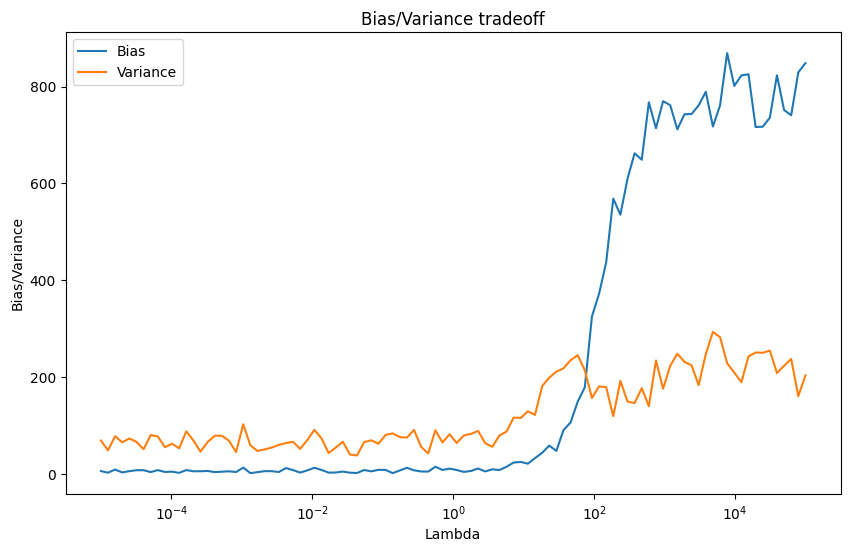

In [16]:
# Please complete this field.
if __name__ == '__main__':
    plot_coefficients_vs_lambda()
    plot_rmse_vs_lambda()
    plot_predicted_vs_true()
    plot_bias_variance_tradeoff()